# Import Libraries


In [50]:
# Data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models and preprocessing
from sklearn.ensemble import RandomForestClassifier  # Classification model
from sklearn.impute import SimpleImputer  # Imputation for missing values
from sklearn.preprocessing import OrdinalEncoder  # Encoder for categorical variables


# Exploratory analysis

In [51]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Overview

In [52]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.050,NaN,S
664,665,1,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.925,NaN,S
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.750,NaN,S
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.000,C93,S
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.500,C104,S


In [53]:
df_train.shape

(891, 12)

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Find duplicates

In [55]:
df_train.duplicated().sum()

0

## null values

In [56]:
df_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

## unique **values**

In [57]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## categorical variables

In [58]:
# Identifying categorical columns in the training dataset
categorical_columns = df_train.select_dtypes(include=['object']).columns

# Iterating through each categorical column
for column in categorical_columns:
    # Check if the number of unique values is less than or equal to 10
    if df_train[column].nunique() <= 10:
        print(f'{column}: {df_train[column].unique()}')

Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]


## numerical variables

In [59]:
# Identifying numerical columns in the training dataset
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

# Iterating through each numerical column
for column in numerical_columns:
    # Check if the number of unique values is less than or equal to 10
    if df_train[column].nunique() <= 10:
        print(f'{column}: {df_train[column].unique()}')


Survived: [0 1]
Pclass: [3 1 2]
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]


<Axes: xlabel='Survived', ylabel='count'>

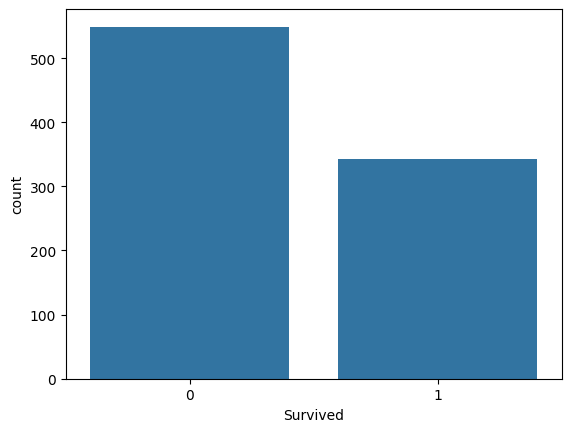

In [60]:
sns.countplot(x='Survived', data=df_train)

<Axes: xlabel='Sex', ylabel='Survived'>

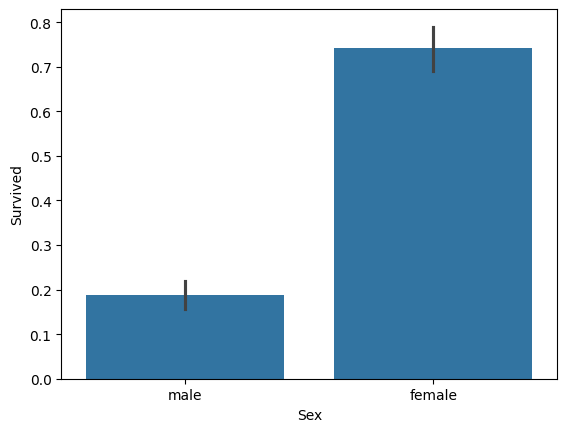

In [61]:
sns.barplot(x='Sex', y = 'Survived', data=df_train)

# Conclusions

- **Ticket, Fare, and Cabin**: These columns have been evaluated and determined to be non-contributory towards the predictive model. It is recommended to remove them from the dataset before proceeding with further predictive analysis.




In [62]:
df_train = df_train.drop(columns=['Cabin', 'Fare', 'Ticket', 'Name'])

In [63]:
df_test = df_test.drop(columns=['Cabin', 'Fare', 'Ticket', 'Name'])

In [64]:
X = df_train.drop(columns=['Survived'], axis = 1)
y = df_train.Survived

## Encoding categorical variables

In [65]:
# Identifying columns with datatype 'object'
s = (X.dtypes == 'object')
object_cols = list(s[s].index)  # Storing the names of columns with 'object' datatype

# Initializing an ordinal encoder for categorical data
ordinal_encoder = OrdinalEncoder()

# Transforming the object columns in the DataFrame using the fitted encoder
X[object_cols] = ordinal_encoder.fit_transform(X[object_cols])

In [66]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,1.0,22.0,1,0,2.0
1,2,1,0.0,38.0,1,0,0.0
2,3,3,0.0,26.0,0,0,2.0
3,4,1,0.0,35.0,1,0,2.0
4,5,3,1.0,35.0,0,0,2.0
...,...,...,...,...,...,...,...
886,887,2,1.0,27.0,0,0,2.0
887,888,1,0.0,19.0,0,0,2.0
888,889,3,0.0,NaN,1,2,2.0
889,890,1,1.0,26.0,0,0,0.0


## fill null values

In [67]:
# Initializing a simple imputer to handle missing values
imputer = SimpleImputer()

# Applying the imputer to the DataFrame 'X' and creating a new DataFrame
x_transformed = pd.DataFrame(imputer.fit_transform(X))

# Ensuring the new DataFrame retains the original column names
x_transformed.columns = X.columns

In [68]:
x_transformed.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

# Model

In [69]:
model = RandomForestClassifier()
model.fit(x_transformed, y)

RandomForestClassifier()

In [70]:
# Applying the ordinal encoder to the categorical variables in df_test
df_test[object_cols] = ordinal_encoder.transform(df_test[object_cols])

# Imputing missing values in df_test
df_test_transformed = pd.DataFrame(imputer.transform(df_test))
df_test_transformed.columns = df_test.columns

# Making predictions using the trained model
predictions = model.predict(df_test_transformed)

# Optionally, creating a DataFrame with the predictions and possibly adding the Passenger ID for reference
result_df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': predictions
})
print(result_df)


     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [73]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

## Cross-Validation


In [79]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create a pipeline that first imputes missing values and then applies our model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # You can change the imputation strategy if needed
    ('classifier', model)
])

# Ensure that 'X' and 'y' are defined correctly and 'X' does not include the target variable
scores = cross_val_score(pipeline, X, y, cv=5)  # Perform 5-fold cross-validation

# Print accuracy scores for each fold of the cross-validation
print("Accuracy scores for each fold:")
print(scores)
print("\nAverage cross-validation score (accuracy): {:.2f}".format(scores.mean()))

Accuracy scores for each fold:
[0.68156425 0.80898876 0.80337079 0.83146067 0.84269663]

Average cross-validation score (accuracy): 0.79
